# Import Dependencies

In [14]:
from elasticsearch import Elasticsearch
import pandas as pd
import json
import glob
import seaborn as sns
import nltk
import plotly.express as px
import scipy
# Assuming you have already created an Elasticsearch client instance 'es'
es = Elasticsearch("http://localhost:9200")

# Completed Tasks

## Metadata

In [1]:
# Elasticsearch query body
all_transcripts = {
  "_source": ["duration", "num_sentences", "num_words", 'publisher'],
  "stored_fields": ["_id"],
  "size": 1027
}

results = es.search(index="spotify_podcast_transcripts", body=all_transcripts)

# Extract relevant information from the search results
# Example hit:
'''{'_index': 'spotify_podcast_transcripts',
  '_type': '_doc',
  '_id': 'spotify:episode:2WQ1GcC6J0k7qsO8Vvf2be',
  '_score': 1.0,
  '_source': {'duration': '49',
   'num_sentences': 676,
   'num_words': 10802,
   'publisher': 'In the Dome Podcast'}}'''
hits = results["hits"]["hits"]

NameError: name 'es' is not defined

In [38]:
# take certain episode information from hit from es db for all hits
by_episode_duration_sentlen = [(hit["_id"],
                                hit["_source"]['duration'],
                                hit["_source"]['num_sentences'],
                                hit["_source"]['num_words'],
                                hit["_source"]['publisher']) for hit in hits]

In [39]:
# convert into dataframe
results = pd.DataFrame.from_records(by_episode_duration_sentlen).rename(columns={0:"episode_uri",
                                                                                 1:'Episode Length (min)',
                                                                                 2:'Number of Sentences',
                                                                                 3:'Number of Words',
                                                                                 4:'Publisher'})
# convert into int
results.iloc[:, 1:-1] = results.iloc[:, 1:-1].astype('int')


C:\Users\Olivia\AppData\Local\Temp\ipykernel_5688\1374980054.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  results.iloc[:, 1:-1] = results.iloc[:, 1:-1].astype('int')


In [40]:
# Quick summary of the results
results.describe().round(2)

,Episode Length (min),Number of Sentences,Number of Words
count,1027.00,1027.00,1027.00
mean,35.49,349.88,6749.59
std,22.99,257.82,4790.90
min,1.00,4.00,60.00
25%,16.00,128.50,2569.50
50%,34.00,300.00,5988.00
75%,53.00,533.50,10318.00
max,90.00,1215.00,22408.00


In [41]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   episode_uri           1027 non-null   object
 1   Episode Length (min)  1027 non-null   int32 
 2   Number of Sentences   1027 non-null   int32 
 3   Number of Words       1027 non-null   int32 
 4   Publisher             1027 non-null   object
dtypes: int32(3), object(2)
memory usage: 28.2+ KB


In [42]:
results[results['Number of Sentences'] <= 200]

,episode_uri,Episode Length (min),Number of Sentences,Number of Words,Publisher
14,spotify:episode:5xH3cdpkxnJhQjPV22sxKC,20,118,3005,Parcast Network
19,spotify:episode:4qUfA4SJE37KDe4UQ7theq,19,137,3262,Lore Party Podcast Network
20,spotify:episode:2bI4lMf13AufxzbyaH83vI,17,182,3469,Skincare Sommeliers
25,spotify:episode:6LhzGRUTkJ3jOp8uB2nXmh,3,38,542,Francisco Lara
31,spotify:episode:2bA3SdEDHSWpbpX4BL5TUf,16,199,2945,Dan Perkins
...,...,...,...,...,...
1016,spotify:episode:2GeHhC1g8F5ybrriBvLPEi,8,55,925,Connie
1018,spotify:episode:5nGrqVsmYEN88GChpccxrF,3,21,379,Elevate Digital
1019,spotify:episode:31u2KJ7szLvm5HPP6GgyYg,16,159,3320,Emma Cooper | The Network Marketing Mum
1024,spotify:episode:6e6LyN7z8yusnDrqnE6Hm5,18,160,3367,Noelle Ames


In [33]:
results[results['Episode Length (min)'] <= results['Episode Length (min)'].median()]

,episode_uri,Episode Length (min),Number of Sentences,Number of Words
9,spotify:episode:0X663c1I6j1cehJvy10WMm,34,229,6152
11,spotify:episode:6jTICOEaZJrExbnvuFZh8e,25,334,4664
14,spotify:episode:5xH3cdpkxnJhQjPV22sxKC,20,118,3005
19,spotify:episode:4qUfA4SJE37KDe4UQ7theq,19,137,3262
20,spotify:episode:2bI4lMf13AufxzbyaH83vI,17,182,3469
...,...,...,...,...
1018,spotify:episode:5nGrqVsmYEN88GChpccxrF,3,21,379
1019,spotify:episode:31u2KJ7szLvm5HPP6GgyYg,16,159,3320
1024,spotify:episode:6e6LyN7z8yusnDrqnE6Hm5,18,160,3367
1025,spotify:episode:7qPPLigaXeKDzE9lUyNY91,4,40,456


In [49]:
results['Publisher'].value_counts().head(20)

Parcast Network                  57
Spotify Studios                  25
Gimlet                           22
AfterBuzz TV                     18
Bitokbitok University             6
Coach Corey Wayne                 5
Optimal Living Daily              4
Gary Vaynerchuk                   4
Simon Whistler                    4
Everyday Positivity               4
Abraham Hicks                     4
Yardaena Osband & Anne Gordon     4
QuickRead.com                     3
OCBC                              3
Dr. Neal Malik                    3
UPCI Youth Ministries             3
Sasha Tamaddon                    3
ASMR                              3
Trent Vineyard                    3
CNX CondÃ© Nast                   3
Name: Publisher, dtype: int64

In [48]:
results[results['Publisher']=='Gimlet']

,episode_uri,Episode Length (min),Number of Sentences,Number of Words,Publisher
71,spotify:episode:0S1ejzvKzr6BJZVUkIGXpr,29,309,5589,Gimlet
88,spotify:episode:1SdguXlFBsxMcYtdPyh0oH,40,552,6491,Gimlet
259,spotify:episode:0NJmaKcBPTiD5jIU40nFl4,3,19,460,Gimlet
260,spotify:episode:1TicQO3vAuYoPoS3XZeL6y,3,27,481,Gimlet
261,spotify:episode:25Vg76v8xDHeVq20caFUOr,3,16,404,Gimlet
262,spotify:episode:3gqwRApB8dGhCbZAaRG4C1,3,16,369,Gimlet
263,spotify:episode:3kq7f86T2C6hrsYGU1YGhv,3,23,428,Gimlet
264,spotify:episode:3SxE188dmuDZeTLiZ1NbFB,3,18,390,Gimlet
265,spotify:episode:3VC6zWWapVYCXanUeVtnnV,3,23,443,Gimlet
266,spotify:episode:3xNSneHkYqNyGDVgz5NKAl,3,20,474,Gimlet


In [24]:
results.to_csv('output/results_duration_episode_length.csv')

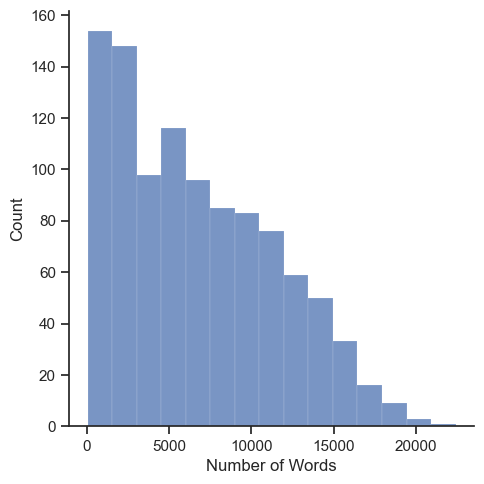

In [30]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(results, x='Number of Words', linewidth=0.1)

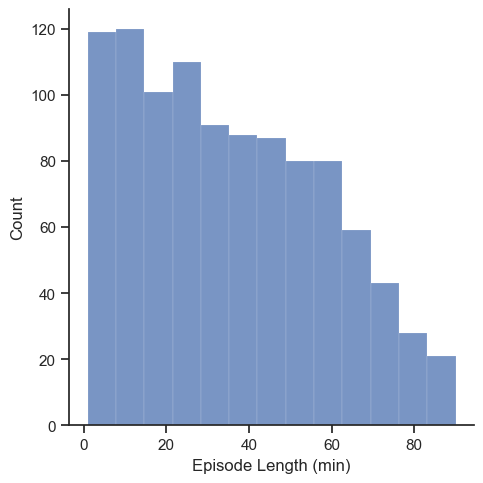

In [25]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(results, x='Episode Length (min)', linewidth=0.1)

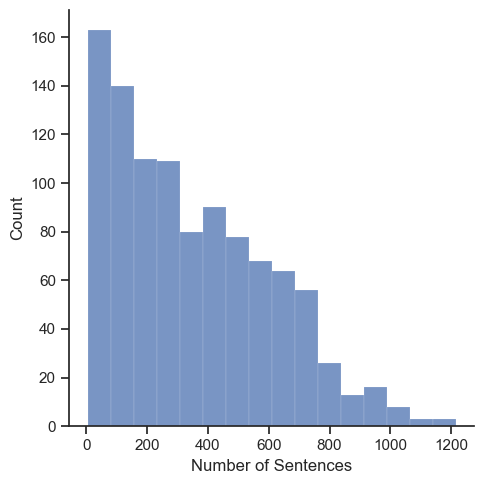

In [26]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(results, x='Number of Sentences', linewidth=0.1)

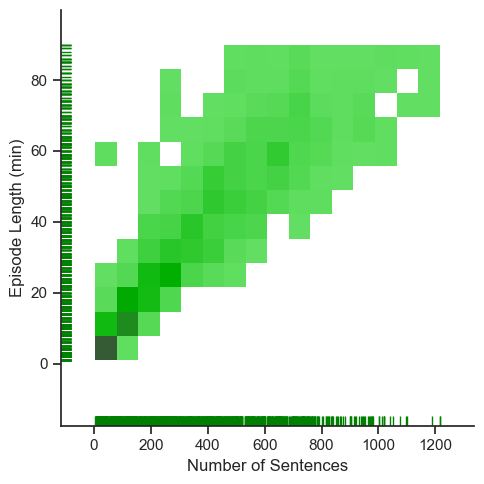

In [28]:

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(data=results, x="Number of Sentences", y="Episode Length (min)",  rug=True, color = 'green')

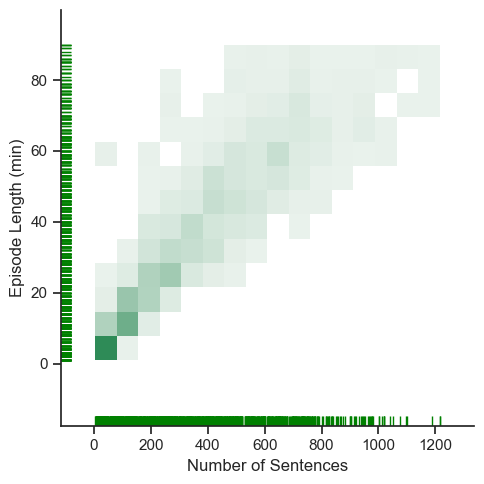

In [83]:
custom_cmap = sns.light_palette("seagreen", as_cmap=True)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.displot(data=results, x="Number of Sentences", y="Episode Length (min)",  rug=True, color = 'green', cmap=custom_cmap)

## Transcripts

In [4]:
all_transcripts = {
  "_source": ["show_uri", "transcript"],
  "stored_fields": ["_id"],
  "size": 1027
}

# Execute the Elasticsearch search query
# show_search_results = es.search(index="spotify_podcast_transcripts", body=show_body)
results = es.search(index="spotify_podcast_transcripts", body=all_transcripts)

# Extract relevant information from the search results
hits = results["hits"]["hits"]


In [5]:
transcripts = [(hit["_id"], hit["_source"]['show_uri'], hit["_source"]['transcript']) for hit in hits]

In [6]:
eval_transcripts = pd.DataFrame.from_records(transcripts).rename(columns={0:"episode_uri",
                                                                          1:'show_uri',
                                                                          2:'Transcript'})
eval_transcripts


,episode_uri,show_uri,Transcript
0,spotify:episode:74t5WREXUbhEKNI89CNSkL,spotify:show:015DbLwcXu2fK7e9jIfbFo,Welcome back to another episode of tuxedo time...
1,spotify:episode:5fG4VlWnWwzAt6mSs0H7lY,spotify:show:01DbRiALDPdvZdoiY8yQL6,"What's up, guys? This episode of the podcast i..."
2,spotify:episode:2WQ1GcC6J0k7qsO8Vvf2be,spotify:show:01eumErJvBdxCW4YJivbwc,"What's up, everybody? Welcome to the in the do..."
3,spotify:episode:5hvOWPoB0j6HMrSVAMtJLV,spotify:show:01Txd706SjsgvM0cm0UXuM,You are listening to Irish illustrate Insider....
4,spotify:episode:7JG3lLnRoDdOxuqjf14ZkM,spotify:show:01Txd706SjsgvM0cm0UXuM,You have tuned into Irish Illustrated Insider....
...,...,...,...
1022,spotify:episode:1t6R1TrR8D7kkKnFcuOD8A,spotify:show:7wbEc7QxASrGQoFyb0dxoS,That's right. Now we are at War. How do you c...
1023,spotify:episode:1JnsLxgHqv9kv21D5bhIKy,spotify:show:7wd4F1RZw7aQKN4K7cVakB,Hey y'all. Welcome to the late night vision sh...
1024,spotify:episode:6e6LyN7z8yusnDrqnE6Hm5,spotify:show:7xjC57YxW8SqmQha1Tjgge,Hello my friends and welcome to episode number...
1025,spotify:episode:7qPPLigaXeKDzE9lUyNY91,spotify:show:7yeMJ1fd1BLgqft0WnARzb,"Fitness mantra Hello, those two guess haplogr..."


In [9]:
eval_transcripts.to_excel('output/eval_transcripts.xlsx', index=False)

## Get specific first chatbot episodes

In [49]:
previously_used_episodes = ['The Women Yell All - S24 E10', '#2 Finding Freedom From Your Anxious Mind w/Dr. Martin Seif founder of Anxiety and Depression Foundation of America','Interview w/ The Professor', 'Dorothy Jane Scott - Murdered','Scandal 36: Carroll Hubbard']

In [50]:
of_interest = []

for episode in previously_used_episodes:
    episode_ = {
        "query": {
            "match_phrase": {
                "episode_name": episode,
            }
        }
    }

    results = es.search(index="spotify_podcast_transcripts", body=episode_)

    # Extract relevant information from the search results
    hits = results["hits"]["hits"]

    if hits:
        episode_uri = hits[0]['_id']
        transcript = hits[0]['_source']['transcript']

        episode_info = {
            'episode_uri': episode_uri,
            'episode_name': episode,
            'transcripts': transcript
        }
        
        of_interest.append(episode_info)

# Create a DataFrame from the list of episode information
original_episodes = pd.DataFrame(of_interest)

In [51]:
original_episodes.to_excel('output/episodes.xlsx', index=False)

In [52]:
original_episodes

,episode_uri,episode_name,transcripts
0,spotify:episode:3QE8qxHtJg3zMrq03R4GOj,The Women Yell All - S24 E10,I'm Maria Menounos and you're tuned in to Afte...
1,spotify:episode:3Vr6AUCTQgVWoE137b4IdB,#2 Finding Freedom From Your Anxious Mind w/Dr...,"Hi, welcome to the tell me what you're proud o..."
2,spotify:episode:4oQZAcd6xnxVA1e2GWaIFb,Interview w/ The Professor,"What's up, guys? Make sure you download the fr..."
3,spotify:episode:4sbSs1xtuf8dF3xtb7btUi,Dorothy Jane Scott - Murdered,"Good morning, and welcome to another episode o..."
4,spotify:episode:2RoLspr2PQTki51sfMhd20,Scandal 36: Carroll Hubbard,In the year leading up to the 2020 election. W...


# Create es for pre-identified episodes of interest

In [75]:
# episodes used for testing
indicator_episodes = ["spotify:episode:5fG4VlWnWwzAt6mSs0H7lY", "spotify:episode:7JG3lLnRoDdOxuqjf14ZkM",
                            "spotify:episode:3kkhUQJ9DXYs6aSdDmPp2V", "spotify:episode:4fJ6Y6IpljKy8FT8DZHx1L",
                            "spotify:episode:5xBPWxqVCocdBgybmHjr5V", "spotify:episode:0X663c1I6j1cehJvy10WMm", 
                            "spotify:episode:61a1JjZO27lGCvCwBaCkpC", "spotify:episode:0goWRy1gwB23rQVy8ci7Wa", 
                            "spotify:episode:0BSD8QYmd2mQ1V43uIrU4I", "spotify:episode:5xH3cdpkxnJhQjPV22sxKC",
                            "spotify:episode:0YPvJfSEw0jacPB3IeT37d", "spotify:episode:1gnpv26FFvIxpnwVbbRXv1",
                            "spotify:episode:6rh4J52THn252yi7t11Yqf", "spotify:episode:3IfmcM2rcWb82601pkPvCh",
                            "spotify:episode:5LJ33LdXWhqOu1KNad6D5q", "spotify:episode:1AxFBio6NwwG0MAjdCK5gK",
                            "spotify:episode:3U33mRnDJcXywmBm1hahlL", "spotify:episode:57Nzb9H2VRZgHcNFChwbBG",
                            "spotify:episode:6vRLNVEQ4xqtMxnms3RZh3", "spotify:episode:1tN044BhlPjjiluZ7Wo7UL",
                            "spotify:episode:1fs86N6FLUKW2e5NdX1dF1", "spotify:episode:1A4cHtP3wIVQutpCgS7kd7",
                            "spotify:episode:1Mi90UjG91rm73qvHzcG0t", "spotify:episode:3TuC8HZp9VdXtxYMQkJI0m",
                            "spotify:episode:67v8V9SOXxivYQfAHSsc5f", "spotify:episode:3QE8qxHtJg3zMrq03R4GOj",
                            "spotify:episode:3Vr6AUCTQgVWoE137b4IdB", "spotify:episode:4oQZAcd6xnxVA1e2GWaIFb",
                            "spotify:episode:4sbSs1xtuf8dF3xtb7btUi", "spotify:episode:2RoLspr2PQTki51sfMhd20"]

In [76]:
# episodes of interest
of_interest = []

# Iterate through each episode and extract the relevant information
for episode in indicator_episodes:
    episode_ = {
        "query": {
            "match_phrase": {
                "_id": episode,
            }
        }
    }

    # Search for the episode
    results = es.search(index="spotify_podcast_transcripts", body=episode_)

    # Extract relevant information from the search results
    hits = results["hits"]["hits"]

    # If there are results, extract the relevant information
    if hits:
        episode_uri = hits[0]['_id']
        sentences = hits[0]['_source']['sentence_tokens']
        publisher = hits[0]['_source']['publisher']
        duration = hits[0]['_source']['duration']

        episode_info = {
            'episode_uri': episode_uri,
            'episode_name': episode,
            'sentences': sentences,
            'publisher': publisher,
            'duration': duration
        }
        
        # Append the episode information to the list
        of_interest.append(episode_info)

# Create a DataFrame from the list of episode information
indicator_episodes_df = pd.DataFrame(of_interest)

In [77]:
indicator_episodes_df

,episode_uri,episode_name,sentences,publisher,duration
0,spotify:episode:5fG4VlWnWwzAt6mSs0H7lY,spotify:episode:5fG4VlWnWwzAt6mSs0H7lY,"[What's up, guys?, This episode of the podcast...",The Wavelengths Podcast,78
1,spotify:episode:7JG3lLnRoDdOxuqjf14ZkM,spotify:episode:7JG3lLnRoDdOxuqjf14ZkM,[You have tuned into Irish Illustrated Insider...,IrishIllustrated.com,47
2,spotify:episode:3kkhUQJ9DXYs6aSdDmPp2V,spotify:episode:3kkhUQJ9DXYs6aSdDmPp2V,[Just wanted to take a brief moment to give yo...,Paddle N Fin Network,64
3,spotify:episode:4fJ6Y6IpljKy8FT8DZHx1L,spotify:episode:4fJ6Y6IpljKy8FT8DZHx1L,[Just wanted to take a brief moment to give yo...,Paddle N Fin Network,61
4,spotify:episode:5xBPWxqVCocdBgybmHjr5V,spotify:episode:5xBPWxqVCocdBgybmHjr5V,[Just wanted to take a brief moment to give yo...,Paddle N Fin Network,70
5,spotify:episode:0X663c1I6j1cehJvy10WMm,spotify:episode:0X663c1I6j1cehJvy10WMm,[Chances are the Tokyo Olympics probably won't...,Norm Nakamura,34
6,spotify:episode:61a1JjZO27lGCvCwBaCkpC,spotify:episode:61a1JjZO27lGCvCwBaCkpC,"[Its Behavior bitches Hey guys, it's Lia and ...",Liat Sacks,58
7,spotify:episode:0goWRy1gwB23rQVy8ci7Wa,spotify:episode:0goWRy1gwB23rQVy8ci7Wa,[Welcome to episode 155 of the Marvel Studios ...,Sean Gerber,61
8,spotify:episode:0BSD8QYmd2mQ1V43uIrU4I,spotify:episode:0BSD8QYmd2mQ1V43uIrU4I,[This episode features discussion of kidnappin...,Parcast Network,39
9,spotify:episode:5xH3cdpkxnJhQjPV22sxKC,spotify:episode:5xH3cdpkxnJhQjPV22sxKC,"[Welcome to par cast crime bites., We're offer...",Parcast Network,20


In [74]:
hits

[{'_index': 'spotify_podcast_transcripts',
  '_type': '_doc',
  '_id': 'spotify:episode:2RoLspr2PQTki51sfMhd20',
  '_score': 6.5303917,
  '_source': {'show_uri': 'spotify:show:2KBfl8eidzorW02RzQf9K8',
   'transcript': "In the year leading up to the 2020 election. We're counting down the biggest scandals in American political history. This is number 36 Carol Hubbard Junior. The former Congressman was charged with three felonies after illegally using his campaign fund and Congressional staff for personal use  56 year old former Congressman Carol Hubbard Junior thought he was getting ready to participate in a sting mission for the FBI the past few years on the hill had been tough for him pesky Agents from the bureau had been poking around his Finance records. They were definitely looking for something no matter Hubbard thought he'd outrun his cooked books with a little quid pro quo. He could play nice for a couple months and help the FBI.  Investigate lobbying in Libya, then they'd see he